## Background

Uncertainty is a facininating concept. It is extremely vast and applies to almost all aspects of life. You could spend your entire life learning about it and still not understand all of it.
Uncertainty is everywhere, in everything we do. For example, uncertainty affects the economy in many ways. Peoples attitude to spending are usually based on their level of confidence in the economy. Uncertainty of our future climate drives us to recycle more, burn more efficient fuel, reduce our emmisions and respect the environment. In a sense, it is almost motivational as once we are aware of something, we typically strive to improve it.
In science, we frequently measure or observe things. We do this so that we can understand them better. By putting a measure on something it allows us to describe something, to visualise it or to comprehend it. Humans will design an experiment or build a model to test or measure a phenomenon and uncertainty will be the measure of the doubt that exists about the result or prediction. 

## Project - Dataset

This project will focus on the field of dimensional metrology and more specifically, measurement systems. A measurement system might be described as a system encompassing the measuring instrument, the software, firmware, people/users, environment, method and the articles that they inspect. When designing a measurement system many aspects must be considered but ultimately the system should have an acceptable accuracy and variance for what it is designed to inspect. In conjunction with this, each measurement result should be accompanied by an uncertainty value since no measurement is ever perfect. When a measurement is taken, many phenomena can occur to influence that result and generally speaking that influence could be captured in the overall uncertainty. Estimating this uncertainy, it is possible to mitigate for the risk of misclassification based off results/observations made.         

## Scenario

You are asked to provide consultation to an aerospace company that manufactures a component. Post manufacture it inspects each component dimensionally to ensure it meets design intent/criteria. The component itself has 4 geometric features that must be verified through inspection, each having a nominal size and an associated tolerance. A measurement system is used to inspect the components to meet volume requirements. There is an issue with this component when it comes to final assembly. It is not fitting with other components at the final assembly plant located in another country. The equipment was installed correctly, has all the necessary certified paperwork and is passing its daily qualification checks. What is going on?

The brief of the project is to create a synthetic dataset. This dataset will attempt to capture what the above situation might look like (in a fairly simplistic approach with assumptions) if it were a real investigation of the measurement phenomenon and try to answer some additional questions along the way.

## Investigation

Investigation starts with the component. It has four geometric features that are inspected. They are relatively simple in terms of geometric complexity. Two features are lengths, one is a width and other is a diameter. There are no complex surfaces or advanced geometric constraints to be inspected.

The features are:

length_1 is 14.010mm +/- 0.020: length_2 is 10.050mm +/- 0.050: width_1 is  50.200mm +/- 0.100: Dia_1 is 30.000mm +/- 0.070

Instruments:

It was found that the instrument is a coordinate measuring machines, often referred to as 'CMM's'. For now lets call it instrument_1
It has a calibration certificate stating the equipments maximum permissable error for error of length indication. After speaking with the OEM, it is understood that this is essentially an accuracy statement for the equipment when measuring length type features.

It is stated in linear type form:  MPEE  = X + L/K   where X and K are constants. (x = um, L = mm, K = no units)

instrument_1 = 2.8 + L/1000 (result is in microns)



The certificate shows that instrument_1 was verified but not calibrated and 2 months ago. It is noted that instrument_1 has a negative bias of 0.1mm. As it was only verified and not calibrated, no adjustment was made for this. The instrument does not exibit any other systematic errors.


Users:

Looking at user of the measurement system, It was discovered that one operator was responsible for running the system.

Mary ran instrument_1 and was quite experienced. A standardised method for use of the equipment was also in place. 


Environment:

instrument_1 was located in a temperature controlled room cerified at 19-21 deg C. However, the climate control was malfunctioning and the temperature was found to be at a static 25 Deg C.


## Summary of Investigation

After further investigation I decide the following:

(1) I need to pull some previous data on measurements and review the results for each feature (2) I need to calculate what the likely instrument error is for measurements of each feature (3) I need to compensate for bias in the equipment (4) I need to investigate the effects of temperature (5) estimate any likely variance (6) estimate what the overall uncertainty might be and (7) analyse the data and generate any conclusions.  

## Simulating the results from 100 components

I would expect the results to be normally distributed for each feature. I'm going to make a few assumptions here. Having reviewed the measurment results I found that length_1 and width_1 were manufactured above centre/target nominal. The other features were relatively centred on nominal. All data should be floating point numbers and should be positive values based on the specifications above.

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#define the features, 100 samples each having different stdev and means
length_1 = np.random.normal(14.011, 0.005, 100)
length_2 = np.random.normal(10.050, 0.0004, 100)
width_1 = np.random.normal(50.210, 0.004, 100)
dia_1 = np.random.normal(30.000, 0.0001, 100)

# type 'variable name' to view the array of data. I just don't need to see it yet

df = pd.DataFrame({'length_1':np.random.normal(14.027, 0.005, 100),'length_2':np.random.normal(10.050, 0.001, 100),'width_1':np.random.normal(50.228, 0.003, 100),'dia_1':np.random.normal(30.000, 0.0001, 100)}) 

df.head(3)
#can use df.head() to free up screen space


,length_1,length_2,width_1,dia_1
0,14.021948,10.048237,50.225523,29.999987
1,14.023353,10.050238,50.231107,29.999963
2,14.030354,10.050382,50.226254,29.999998


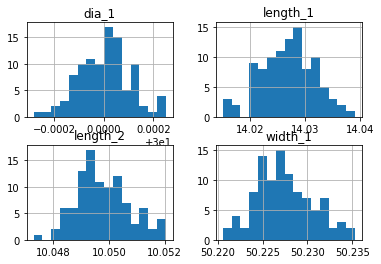

In [9]:
# a quick visual check of the data in the dataframe using pandas.
hist = df.hist(bins=15)


## Instrument Accuracy


In [3]:
mpe = 2.8
err_length_1 = ((2.8 + 14.010/1000) - mpe)
err_length_2 = ((2.8 + 10.050/1000) - mpe)
err_width_1 = ((2.8 + 50.200/1000) - mpe)
err_dia_1 = ((2.8 + 30.000/1000) - mpe)

print("Approximate Error is")
print(err_length_1, err_length_2, err_width_1, err_length_2)

Approximate Error is
0.014009999999999856 0.010050000000000114 0.0501999999999998 0.010050000000000114


This gives me an idea of the likely accuracy associated with each feature when using this specific instrument. It's a first step in looking for any potential misclassification issues but it doesn't tell the entire story. Since the parts are not actually all the same length maybe a better way to estimate this would be to apply the formula to each result obtained in the 100 samples and then add that (or take away) to either the same dataframe or a seperate one and then join them. For the purpose of this exercise, lets assume that i'm only interested in the positive error since the components are not fitting in final assembly and it is assumed they are too large.

In [14]:
df1 = pd.DataFrame({'err_length_1':err_length_1 + length_1,'err_length_2':err_length_2 + length_2,'err_width_1':err_width_1 + width_1,'err_dia_1':err_dia_1 + dia_1})
df1.head(3)

,err_length_1,err_length_2,err_width_1,err_dia_1
0,14.026593,10.060418,50.261458,30.030253
1,14.030304,10.059532,50.255372,30.030022
2,14.039366,10.059650,50.262270,30.029883


In [13]:
left = df
right = df1
df3 = pd.concat([df,df1], axis=1)
df3.head(3)

,length_1,length_2,width_1,dia_1,bias_length_1,bias_length_2,bias_width_1,bias_dia_1
0,14.026498,10.050285,50.231495,29.999936,14.112583,10.150368,50.311258,30.100253
1,14.028127,10.048884,50.228805,29.999989,14.116294,10.149482,50.305172,30.100022
2,14.031620,10.049126,50.226764,29.999904,14.125356,10.149600,50.312070,30.099883


## Bias

As mentioned earlier the calibration certificate stated a negative systematic error of 5.0um or 0.005mm. The instrument was falsely reading 0.005 too low. This will have to be added to dataset.

In [11]:
bias = 0.100
df4 = df1 = pd.DataFrame({'bias_length_1':length_1 + bias,'bias_length_2':length_2 + bias,'bias_width_1':width_1 + bias,'bias_dia_1':dia_1 + bias})
df4.head(3)

,bias_length_1,bias_length_2,bias_width_1,bias_dia_1
0,14.112583,10.150368,50.311258,30.100253
1,14.116294,10.149482,50.305172,30.100022
2,14.125356,10.149600,50.312070,30.099883


In [12]:
df5 = pd.concat([df3,df4], axis=1)
df5.head(3)

,length_1,length_2,width_1,dia_1,err_length_1,err_length_2,err_width_1,err_dia_1,bias_length_1,bias_length_2,bias_width_1,bias_dia_1
0,14.026498,10.050285,50.231495,29.999936,14.026593,10.060418,50.261458,30.030253,14.112583,10.150368,50.311258,30.100253
1,14.028127,10.048884,50.228805,29.999989,14.030304,10.059532,50.255372,30.030022,14.116294,10.149482,50.305172,30.100022
2,14.031620,10.049126,50.226764,29.999904,14.039366,10.059650,50.262270,30.029883,14.125356,10.149600,50.312070,30.099883


## Temperature

The temperature was found to be 25 deg C. That was being measured by a piece of equipment with an accuracy of +/- 1 degree so it's likely that the temperature was between 24-26 degrees C.

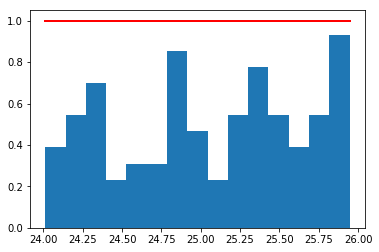

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

temp = np.random.uniform(24,26, 100)
#temp
count, bins, ignored = plt.hist(temp, 15, density=True)
plt.plot(bins, np.ones_like(bins), linewidth=2, color='r')
plt.show()

Temperature compensation can be worked out individually for each measurement, however lets assume a scale correction factor is known in this case. The correction factor is 0.999. 

$$\Delta L = \Delta T